In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
import csv
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
from scipy import interpolate
from scipy.stats import gamma, halfnorm
from tqdm import tqdm
import corner
import emcee

In [5]:
columns = ["x","y","z","w","data","error"]
datatab = pd.read_table("Updateddata.txt",names = columns)
datatab

,x,y,z,w,data,error
0,0.1,-1.439897,0.0,0.25,-2.831628,0.561478
1,0.1,-1.308997,0.5,0.25,-3.006489,0.485720
2,0.1,-1.178097,1.0,0.25,-2.354835,1.270193
3,0.1,-1.047198,1.0,0.25,-2.974002,0.983807
4,0.1,-0.916298,1.0,0.25,-2.401510,1.254378
...,...,...,...,...,...,...
995,0.7,1.570796,-1.0,1.00,-2.287634,2.337560
996,0.8,1.570796,-1.0,1.00,-2.164392,1.612457
997,0.9,1.570796,-1.0,1.00,-2.152368,1.550488
998,1.0,-1.439897,-1.0,1.00,-2.579505,0.442328


In [6]:
x = datatab['x']
y = datatab['y']
z = datatab['z']
w = datatab['w']
data = datatab['data']
error = datatab['error']

In [7]:
datam1 = datatab[0:250]
xm1 = datam1['x'].values
ym1 = datam1['y'].values
zm1 = datam1['z'].values
wm1 = datam1['w'].values
dm1 = datam1['data'].values
em1 = datam1['error'].values
X1 = np.column_stack((xm1, ym1, zm1, wm1))
X1_train, X1_test, D1_train, D1_test, E1_train, E1_test = train_test_split(X1,dm1.reshape(-1, 1),em1,train_size=0.8,random_state=1)

In [8]:
datam2 = datatab[250:500]
xm2 = datam2['x'].values
ym2 = datam2['y'].values
zm2 = datam2['z'].values
wm2 = datam2['w'].values
dm2 = datam2['data'].values
em2 = datam2['error'].values
X2 = np.column_stack((xm2, ym2, zm2, wm2))
X2_train, X2_test, D2_train, D2_test, E2_train, E2_test = train_test_split(X2, dm2.reshape(-1,1),em2, train_size=0.8, random_state=3)

In [9]:
datam3 = datatab[500:750]
xm3 = datam3['x'].values
ym3 = datam3['y'].values
zm3 = datam3['z'].values
wm3 = datam3['w'].values
dm3 = datam3['data'].values
em3 = datam3['error'].values
X3 = np.column_stack((xm3, ym3, zm3, wm3))
X3_train, X3_test, D3_train, D3_test,E3_train, E3_test = train_test_split(X3, dm3.reshape(-1,1),em3, train_size=0.8, random_state=5)

In [10]:
datam4 = datatab[750:]
xm4 = datam4['x'].values
ym4 = datam4['y'].values
zm4 = datam4['z'].values
wm4 = datam4['w'].values
dm4 = datam4['data'].values
em4 = datam4['error'].values
X4 = np.column_stack((xm4, ym4, zm4, wm4))
X4_train, X4_test, D4_train, D4_test,E4_train, E4_test = train_test_split(X4, dm4.reshape(-1,1),em4, train_size=0.8, random_state=7)

In [11]:
X_train = np.concatenate((X1_train,X2_train,X3_train,X4_train))
X_test = np.concatenate((X1_test,X2_test,X3_test,X4_test))
D_train = np.concatenate((D1_train,D2_train,D3_train,D4_train))
D_test = np.concatenate((D1_test,D2_test,D3_test,D4_test))
E_train = np.concatenate((E1_train,E2_train,E3_train,E4_train))
E_test = np.concatenate((E1_test,E2_test,E3_test,E4_test))
#print(D_test.shape,D_train.shape,X_test.shape,X_train.shape)

In [12]:
X = np.column_stack((x, y, z, w))
D = data.to_numpy().reshape(-1,1)

guess_l = (1, 1., 1., 1.)
bounds_l = ((1e-20, 4.),) * 4
#guess_l = 1
#bounds_l = (1e-20, 4.)
guess_n = 1.
bounds_n = (1e-20, 1.)
guess_signal_var = 1.0
bounds_signal_var = (1e-20, 1e20)

kernel = C(constant_value=guess_signal_var, constant_value_bounds=bounds_signal_var) * \
         RBF(length_scale=guess_l, length_scale_bounds=bounds_l) + \
         WhiteKernel(noise_level=guess_n, noise_level_bounds=bounds_n)

gpr = GaussianProcessRegressor(kernel=kernel, alpha=E_train**2,normalize_y=True, n_restarts_optimizer=10)
gpr.fit(X_train, D_train)
print(f"Fitted Kernel: {gpr.kernel_}")

Fitted Kernel: 0.898**2 * RBF(length_scale=[7.93e-07, 0.854, 0.815, 2.29]) + WhiteKernel(noise_level=1e-20)


C:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-20. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [13]:
print("gpr.kernel:", gpr.kernel_.theta)

gpr.kernel: [ -0.21596648 -14.04686669  -0.15828915  -0.20408287   0.82676437
 -46.05170186]


In [14]:
Dfit1, Dstd1 = gpr.predict(X1, return_std=True)
Dfit2, Dstd2 = gpr.predict(X2, return_std=True)
Dfit3, Dstd3 = gpr.predict(X3, return_std=True)
Dfit4, Dstd4 = gpr.predict(X4, return_std=True)

In [16]:
def log_prior(theta):
    sigma, l1, l2, l3, l4, sigma_n = theta
    #l1, l2, l3, l4, sigma = theta
    #l1,sigma, sigma_n = theta
    # All must be positive.
    if l1 <= 0 or l2 <= 0 or l3 <= 0 or l4 <= 0 or sigma <= 0 or  sigma_n <= 0:
    #if l1<=0 or sigma <= 0 or sigma_n <= 0:
        return -np.inf
    logp_l1 = gamma(a=2, scale=1e6).logpdf(l1)
    logp_l2 = gamma(a=109, scale=0.009).logpdf(l2)
    logp_l3 = gamma(a=107, scale=0.009).logpdf(l3)
    logp_l4 = gamma(a=106.985, scale=0.011).logpdf(l4)
    logp_sigma = gamma(a=111, scale=0.03).logpdf(sigma)
    logp_sigma_n = halfnorm(scale=0.254).logpdf(sigma_n)
    log_jacobian = np.sum(theta)
    logptrue =  logp_l1 + logp_l2 + logp_l3 + logp_l4 + logp_sigma + logp_sigma_n + log_jacobian
    return logptrue

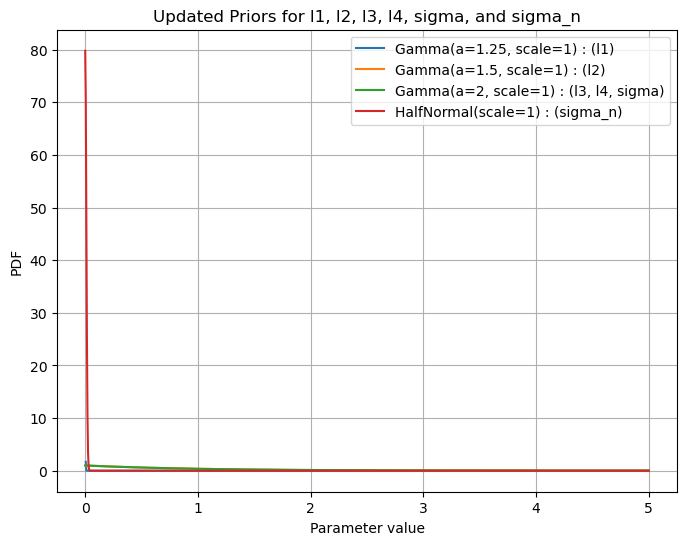

In [58]:
x = np.linspace(0, 5, 1000)

pdf_gamma_125 = gamma(a=.50, scale=.001).pdf(x)
pdf_gamma_15  = gamma(a=1, scale=1).pdf(x)
pdf_gamma_2   = gamma(a=1, scale=1).pdf(x)

#pdf_halfnorm = halfnorm(scale=0.01).pdf(x)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf_gamma_125, label="Gamma(a=1.25, scale=1) : (l1)")
plt.plot(x, pdf_gamma_15,  label="Gamma(a=1.5, scale=1) : (l2)")
plt.plot(x, pdf_gamma_2,   label="Gamma(a=2, scale=1) : (l3, l4, sigma)")
plt.plot(x, pdf_halfnorm,  label="HalfNormal(scale=1) : (sigma_n)")

plt.xlabel("Parameter value")
plt.ylabel("PDF")
plt.title("Updated Priors for l1, l2, l3, l4, sigma, and sigma_n")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
def log_posterior(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = gpr.log_marginal_likelihood(theta)
    return lp + ll

In [15]:
ndim = 6
nwalkers = 100
initial_pos = gpr.kernel_.theta + 1e-1 * np.random.randn(nwalkers, ndim)

# Set up the emcee sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)

# Run the MCMC sampler for nsteps
nsteps = 800
print("Running MCMC...")
sampler.run_mcmc(initial_pos, nsteps, progress=True)

# Discard some burn-in and thin the chain.
burnin = 200
thin = 15
samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
print("Shape of the posterior samples:", samples.shape)

Running MCMC...


  0%|          | 0/800 [00:00<?, ?it/s]C:\Users\seanw\anaconda3\Lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 800/800 [00:00<00:00, 914.25it/s]

Shape of the posterior samples: (4000, 6)


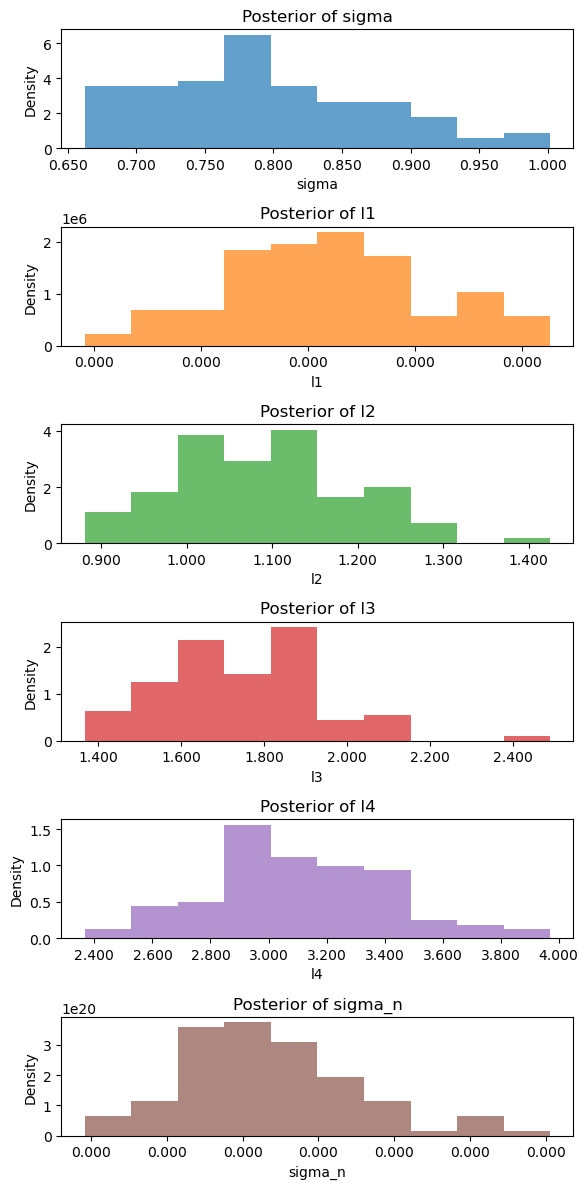

4000


In [16]:
# Plot distributions
true_samples = np.exp(samples)
labels = ["sigma","l1", "l2", "l3", "l4", "sigma_n"]
#labels = ["sigma","l1", "sigma_n"]
fig, axes = plt.subplots(ndim, 1, figsize=(6, 2 * ndim))
for i in range(ndim):
    axes[i].hist(true_samples[:, i], bins=10, density=True, alpha=0.7, color='C{}'.format(i))
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel("Density")
    axes[i].set_title("Posterior of " + labels[i])
    axes[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
plt.tight_layout()
plt.show()
print(len(samples))

In [17]:
# Compute the mean for each hyperparameter (along the sample axis)
mean_values = np.mean(true_samples, axis=0)
std_values = np.std(true_samples, axis=0)

# Compute the 2.5th and 97.5th percentiles for a 95% credible interval.
# This returns an array with shape (2, ndim) where the first row is the lower bound and the second is the upper bound.
ci_bounds = np.percentile(true_samples, [2.5, 97.5], axis=0)

# Print the results for each parameter
labels = ["sigma","l1", "l2", "l3", "l4", "sigma_n"]
for i, label in enumerate(labels):
    print(f"{label}: mean = {mean_values[i]:.4f}, std = {std_values[i]:.4f}, 95% CI = [{ci_bounds[0, i]:.4f}, {ci_bounds[1, i]:.4f}]")

sigma: mean = 0.7961, std = 0.0793, 95% CI = [0.6739, 0.9930]
l1: mean = 0.0000, std = 0.0000, 95% CI = [0.0000, 0.0000]
l2: mean = 1.0925, std = 0.1023, 95% CI = [0.9181, 1.2930]
l3: mean = 1.7445, std = 0.1861, 95% CI = [1.4154, 2.1196]
l4: mean = 3.1038, std = 0.3060, 95% CI = [2.5517, 3.7561]
sigma_n: mean = 0.0000, std = 0.0000, 95% CI = [0.0000, 0.0000]


In [18]:
S = len(samples)  # Number of MCMC samples

# Storage for predictions
pred_means = np.zeros((S, len(X1)))
pred_vars = np.zeros((S, len(X1)))
pred_testmeans = np.zeros((S, len(X1_test)))

# Iterate over posterior samples of hyperparameters with a progress bar
for s in tqdm(range(S), desc="Running GP Predictions", unit="sample"):
    theta_s = true_samples[s]  # Get one sample from posterior
    kernel = gpr.kernel_.clone_with_theta(theta_s)  # Set kernel with sampled hyperparameters
    gp = GaussianProcessRegressor(kernel=kernel, alpha=E_train**2, optimizer=None)  
    gp.fit(X_train, D_train)  # Fit GP with the sampled hyperparameters
    # Predictive mean and variance for X1
    pred_means[s, :], pred_stds = gp.predict(X1, return_std=True)
    pred_vars[s, :] = pred_stds**2  # Convert std deviation to variance

Running GP Predictions: 100%|██████████| 4000/4000 [05:08<00:00, 12.99sample/s]


In [19]:
final_mean = np.mean(pred_means, axis=0)
final_variance = np.mean(pred_vars + pred_means**2, axis=0) - final_mean**2
final_std = np.sqrt(final_variance)
Dfit1 = final_mean
Dstd1 = final_std
#print(final_variance)

In [20]:
print(final_mean.shape)

(250,)


In [21]:
x_coords1 = X1_test[:,0]
y_coords1 = X1_test[:,1]

test_indices = np.array([np.where((X1 == test_point).all(axis=1))[0][0] for test_point in X1_test])

Dtrue1 = dm1[test_indices]
Dpred1 = final_mean[test_indices]

rel_diff1 = np.abs(Dtrue1 - Dpred1) / np.abs(Dtrue1)
print(rel_diff1.shape)

(50,)


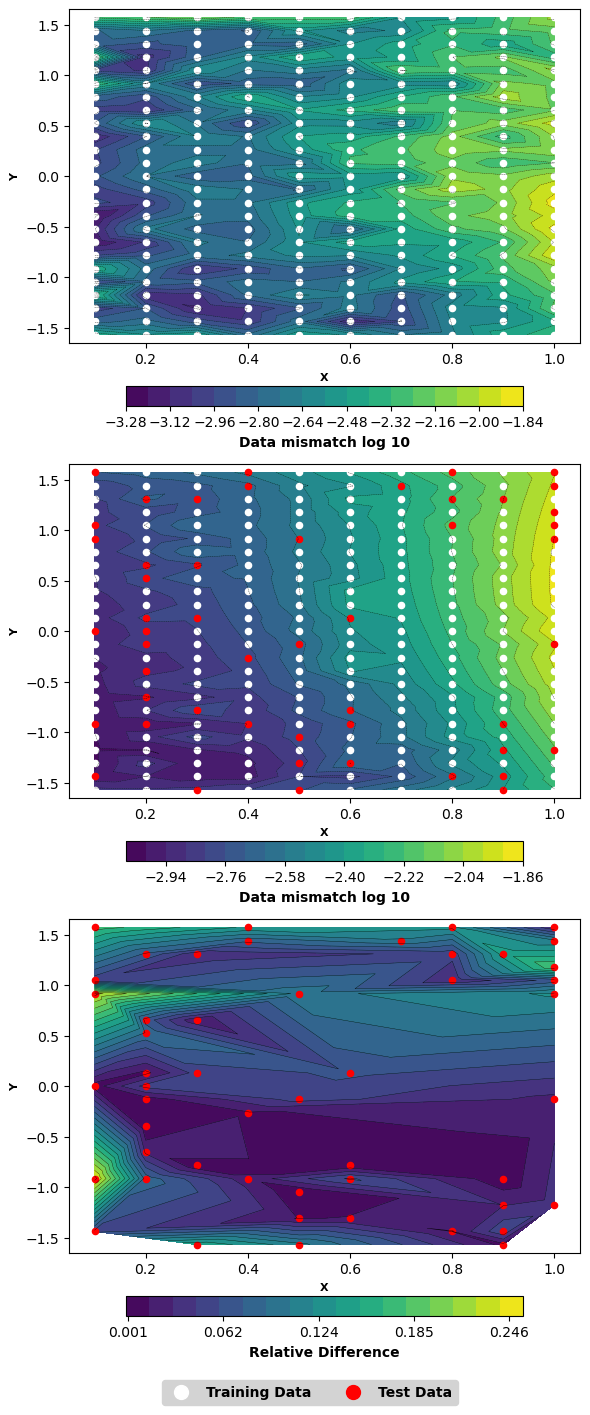

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(6, 15))

# Define custom colormap
viridis_highcontrast = LinearSegmentedColormap.from_list("viridis_highcontrast", plt.cm.viridis(np.linspace(0, 1, 100)))

# Plot True Data
contour1 = axes[0].tricontourf(xm1, ym1, dm1, levels=20, cmap=viridis_highcontrast)
axes[0].tricontour(xm1, ym1, dm1, levels=20, colors='black', linewidths=0.25)
axes[0].scatter(xm1, ym1, s=20, c='white')
axes[0].set_xlim((0.05, 1.05))
axes[0].set_ylim((-1.65, 1.65))
#axes[0].set_title(f'True Data, {title}', size=16, weight='bold')
axes[0].set_xlabel('X', size=8, weight='bold')
axes[0].set_ylabel('Y', size=8, weight='bold')
cbar1 = fig.colorbar(contour1, ax=axes[0], orientation='horizontal', fraction=0.05, pad=0.11)
cbar1.set_label("Data mismatch log 10", size=10, weight='bold')

# Plot GPR Model
contour2 = axes[1].tricontourf(xm1, ym1, final_mean, levels=20, cmap=viridis_highcontrast)
axes[1].tricontour(xm1, ym1, final_mean, levels=20, colors='black', linewidths=0.25)
axes[1].scatter(X1_train[:, 0], X1_train[:, 1], s=20, c='white', label='Train')
axes[1].scatter(X1_test[:, 0], X1_test[:, 1], s=20, c='red', label='Test')
axes[1].set_xlim((0.05, 1.05))
axes[1].set_ylim((-1.65, 1.65))
#axes[1].set_title(f'GPR Model, {title}', size=16, weight='bold')
axes[1].set_xlabel('X', size=8, weight='bold')
axes[1].set_ylabel('Y', size=8, weight='bold')
cbar2 = fig.colorbar(contour2, ax=axes[1], orientation='horizontal', fraction=0.05, pad=0.11)
cbar2.set_label("Data mismatch log 10", size=10, weight='bold')

# Plot Relative Differences
contour3 = axes[2].tricontourf(x_coords1, y_coords1, rel_diff1, levels=20, cmap=viridis_highcontrast)
axes[2].tricontour(x_coords1, y_coords1, rel_diff1, levels=20, colors='black', linewidths=0.25)
axes[2].scatter(x_coords1, y_coords1, s=20, c='red')
axes[2].set_xlim((0.05, 1.05))
axes[2].set_ylim((-1.65, 1.65))
#axes[2].set_title(f'Relative Differences, {title}', size=16, weight='bold')
axes[2].set_xlabel('X', size=8, weight='bold')
axes[2].set_ylabel('Y', size=8, weight='bold')
cbar3 = fig.colorbar(contour3, ax=axes[2], orientation='horizontal', fraction=0.05, pad=0.11)
cbar3.set_label("Relative Difference", size=10, weight='bold')
cbar3.set_ticks(np.around(np.linspace(rel_diff1.min(), rel_diff1.max(), 5), 3))

# Add Legend for Train/Test Data
train_marker = mlines.Line2D([], [], color='white', marker='o', linestyle='None', markersize=10, label='Training Data')
test_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Test Data')

fig.legend(
    handles=[train_marker, test_marker],
    loc='lower center',
    bbox_to_anchor=(0.525, -0.025),
    ncol=2,
    markerscale=1,
    fontsize=14,
    frameon=True,  
    prop={'weight': 'bold'}
)

# Customize the legend background color
legend = fig.legends[0]
legend.get_frame().set_facecolor('lightgrey')  
legend.get_frame().set_edgecolor('lightgrey')  
legend.get_frame().set_alpha(1)

plt.tight_layout(rect=[0, 0, 1, 0.92]) 
plt.show()


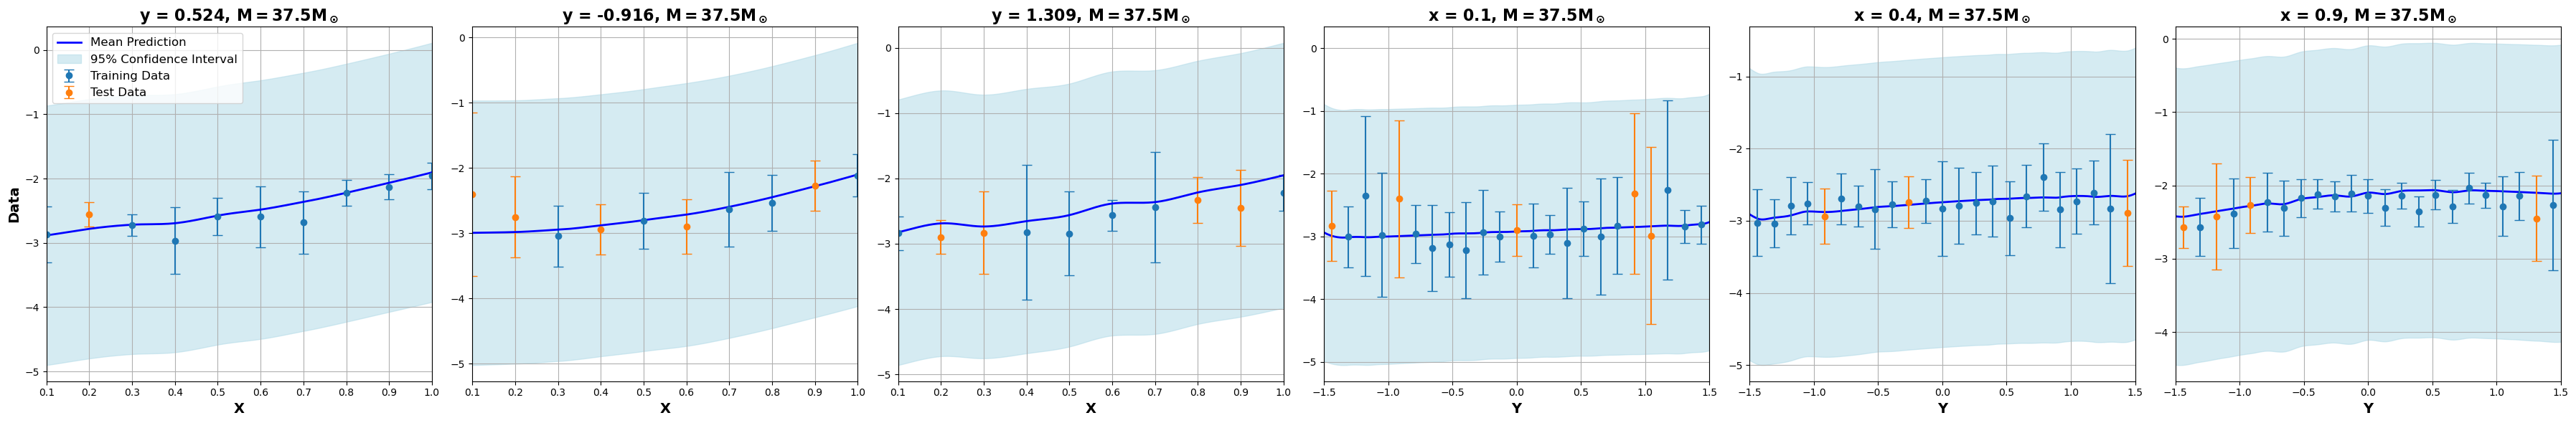

In [23]:
includeerror = 1
x1train = X1_train[:,0]
y1train = X1_train[:,1]
x1test = X1_test[:,0]
y1test = X1_test[:,1]
xpoints = np.linspace(0, 1, 1000)
ypoints = [0.5235987755982988,-0.9162978572970231,1.3089969389957472]
ypoints2 = np.linspace(-1.5707963267948966,1.5707963267948966,1000)
xpoints2 = [ 0.1,0.4,0.9]
titles = [
    f"y = {round(ypoints[0], 3)}, $\\mathbf{{M = 37.5M_\\odot}}$",
    f"y = {round(ypoints[1], 3)}, $\\mathbf{{M = 37.5M_\\odot}}$",
    f"y = {round(ypoints[2], 3)}, $\\mathbf{{M = 37.5M_\\odot}}$",
    f"x = {round(xpoints2[0], 3)}, $\\mathbf{{M = 37.5M_\\odot}}$",
    f"x = {round(xpoints2[1], 3)}, $\\mathbf{{M = 37.5M_\\odot}}$",
    f"x = {round(xpoints2[2], 3)}, $\\mathbf{{M = 37.5M_\\odot}}$"
]


fig, axes = plt.subplots(1, 6, figsize=(36, 6), sharey=False)
j = 0

for i, ax in enumerate(axes):
    if (i<=2):
        ypoint = ypoints[i]
        zgridlinear_mean = griddata((xm1, ym1), Dfit1, (xpoints, ypoint), method="cubic")
        zgridlinear_std = griddata((xm1, ym1), Dstd1, (xpoints, ypoint), method="cubic")
        indices1 = np.isclose(y1train,ypoints[i])
        indices2 = np.isclose(y1test,ypoints[i])
        
        if includeerror ==1 :
            ax.errorbar(x1train[indices1].ravel(), D1_train[indices1].ravel(), yerr=E1_train[indices1].ravel(), fmt='o', capsize=5,label = 'Training Data')
            ax.errorbar(x1test[indices2].ravel(),D1_test[indices2].ravel(), yerr=E1_test[indices2].ravel(), fmt='o', capsize=5,label = 'Test Data')
        else:
            ax.scatter(x1train[indices1],D1_train[indices1],s=100,color='black',label = 'Training Data')
            ax.scatter(x1test[indices2],D1_test[indices2],s=200,color='red',label = 'Test Data')
        ax.plot(xpoints, zgridlinear_mean,label='Mean Prediction', color='blue', linewidth=2)
        ax.fill_between(
            xpoints,
            zgridlinear_mean - 2 * zgridlinear_std, 
            zgridlinear_mean + 2 * zgridlinear_std, 
            alpha=0.5,
            color='lightblue',
            label='95% Confidence Interval'
        )
        
        ax.set_xlim((0.1, 1))
        ax.set_xlabel('X', fontsize=14, weight='bold')
        ax.set_title(titles[i], fontsize=16, weight='bold')
        ax.grid(True)
    else:
        xpoint = xpoints2[j]
        zgridlinear_mean = griddata((xm1, ym1), Dfit1, (xpoint, ypoints2), method="cubic")
        zgridlinear_std = griddata((xm1, ym1), Dstd1, (xpoint, ypoints2), method="cubic")

        indices1 = np.isclose(x1train,xpoint)
        indices2 = np.isclose(x1test,xpoint)
        ax.plot(ypoints2, zgridlinear_mean, label='Mean Prediction', color='blue', linewidth=2)
        if includeerror == 1:
            ax.errorbar(y1train[indices1].ravel(), D1_train[indices1].ravel(), yerr=E1_train[indices1].ravel(),fmt='o', capsize=5,label = 'Training Data')
            ax.errorbar(y1test[indices2].ravel(),D1_test[indices2].ravel(), yerr=E1_test[indices2].ravel(), fmt='o', capsize=5,label = 'Test Data')
        else:
            ax.scatter(y1train[indices1],D1_train[indices1],s=100,color='black',label = 'Training Data')
            ax.scatter(y1test[indices2],D1_test[indices2],s=200,color='red',label = 'Test Data')    
        ax.fill_between(
            ypoints2,
            zgridlinear_mean - 2 * zgridlinear_std, 
            zgridlinear_mean + 2 * zgridlinear_std, 
            alpha=0.5,
            color='lightblue',
            label='95% Confidence Interval'
        )
        
        ax.set_xlim((-1.5, 1.5))
        ax.set_xlabel('Y', fontsize=14, weight='bold')
        ax.set_title(titles[i], fontsize=16, weight='bold')
        ax.grid(True)
        j+=1
        
axes[0].set_ylabel('Data', fontsize=14, weight='bold')

axes[0].legend(fontsize=12,loc='upper left',frameon=True)
legend.get_frame().set_facecolor('white')  # Set the background color to grey
legend.get_frame().set_edgecolor('white')  # Optional: Add a black edge to the frame
legend.get_frame().set_alpha(1)  # Optional: Set opacity (1 = solid)

#plt.savefig("", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()